In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [378]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [379]:
df = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
print(df.shape) 
df.head()

(95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


FraudResult
0    95469
1      193
Name: count, dtype: int64


Text(0.5, 1.0, "'Distribution of Transactions'")

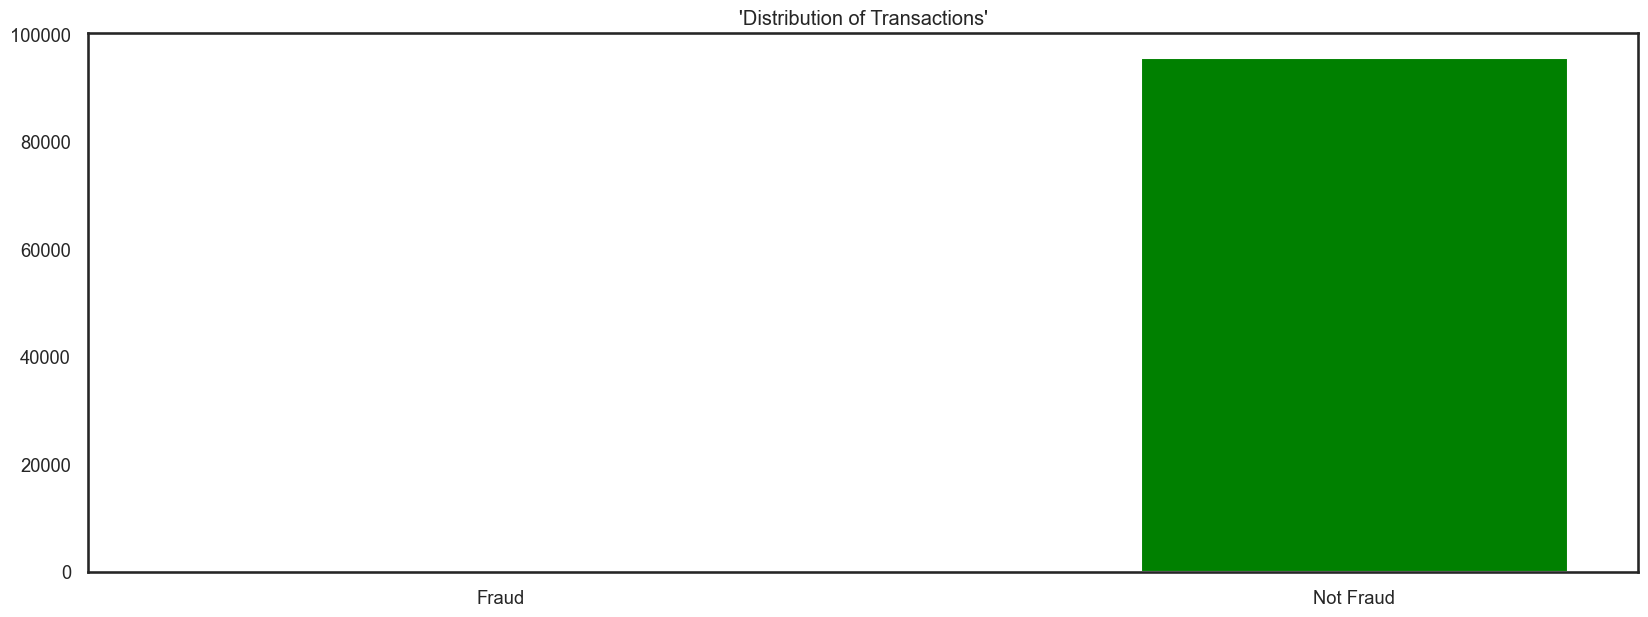

In [380]:
print(df.FraudResult.value_counts())
plt.bar("Fraud", df["FraudResult"].value_counts()[1], color="red")
plt.bar("Not Fraud", df["FraudResult"].value_counts()[0], width=0.5, color="green")
plt.title("'Distribution of Transactions'")

In [381]:
y = df.FraudResult
X = df.drop('FraudResult', axis=1)



In [382]:
df.CountryCode.value_counts()

CountryCode
256    95662
Name: count, dtype: int64

In [383]:
df.CurrencyCode.value_counts()

CurrencyCode
UGX    95662
Name: count, dtype: int64

In [384]:

X['TransactionStartTime'] = X['TransactionStartTime'].str.replace('T',' ')
X['TransactionStartTime'] = X['TransactionStartTime'].str.replace('Z','')
TransactionDate =  X['TransactionStartTime'].str.split(' ').str[0]
X['TransactionYear'] =  TransactionDate.str.split('-').str[0]
X['TransactionMonth'] = TransactionDate.str.split('-').str[1]
X['TransactionDay'] = TransactionDate.str.split('-').str[2]

TransactionTime =  X['TransactionStartTime'].str.split(' ').str[1]
X['TransactionHour'] =  TransactionTime.str.split(':').str[0]
X['TransactionMinute'] = TransactionTime.str.split(':').str[1]
X['TransactionSeconde'] = TransactionTime.str.split(':').str[2]
X.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000.0,1000,2018-11-15 02:18:49,2,2018,11,15,02,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-20.0,20,2018-11-15 02:19:08,2,2018,11,15,02,19,08
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500.0,500,2018-11-15 02:44:21,2,2018,11,15,02,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,20000.0,21800,2018-11-15 03:32:55,2,2018,11,15,03,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-644.0,644,2018-11-15 03:34:21,2,2018,11,15,03,34,21


In [385]:
test['TransactionStartTime'] = test['TransactionStartTime'].str.replace('T',' ')
test['TransactionStartTime'] = test['TransactionStartTime'].str.replace('Z','')
TransactionDate =  test['TransactionStartTime'].str.split(' ').str[0]
test['TransactionYear'] =  TransactionDate.str.split('-').str[0]
test['TransactionMonth'] = TransactionDate.str.split('-').str[1]
test['TransactionDay'] = TransactionDate.str.split('-').str[2]

TransactionTime =  test['TransactionStartTime'].str.split(' ').str[1]
test['TransactionHour'] =  TransactionTime.str.split(':').str[0]
test['TransactionMinute'] = TransactionTime.str.split(':').str[1]
test['TransactionSeconde'] = TransactionTime.str.split(':').str[2]
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,...,1000.0,1000,2019-02-13 10:01:40,4,2019,02,13,10,01,40
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,...,2000.0,2000,2019-02-13 10:02:12,2,2019,02,13,10,02,12
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-50.0,50,2019-02-13 10:02:30,2,2019,02,13,10,02,30
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,...,3000.0,3000,2019-02-13 10:02:38,4,2019,02,13,10,02,38
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-60.0,60,2019-02-13 10:02:58,2,2019,02,13,10,02,58


In [386]:
X=X.drop(['CountryCode','CurrencyCode','ProductCategory','TransactionStartTime'], axis=1)

for columnName in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId','CustomerId' , 'ProviderId', 'ProductId', 'ChannelId']:

    ID = X[columnName].str.split('_').str[1]

    X[columnName] = ID


X.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde
0,76871,36123,3957,887,4406,6,10,3,1000.0,1000,2,2018,11,15,02,18,49
1,73770,15642,4841,3829,4406,4,6,2,-20.0,20,2,2018,11,15,02,19,08
2,26203,53941,4229,222,4683,6,1,3,500.0,500,2,2018,11,15,02,44,21
3,380,102363,648,2185,988,1,21,3,20000.0,21800,2,2018,11,15,03,32,55
4,28195,38780,4841,3829,988,4,6,2,-644.0,644,2,2018,11,15,03,34,21


In [387]:
test=test.drop(['CountryCode','CurrencyCode','ProductCategory','TransactionStartTime'], axis=1)

for columnName in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId','CustomerId' , 'ProviderId', 'ProductId', 'ChannelId']:

    ID = test[columnName].str.split('_').str[1]

    test[columnName] = ID


test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde
0,50600,35028,2441,4426,2857,5,3,3,1000.0,1000,4,2019,02,13,10,01,40
1,95109,45139,3439,2643,3874,5,15,3,2000.0,2000,2,2019,02,13,10,02,12
2,47357,74887,4841,3829,2857,4,6,2,-50.0,50,2,2019,02,13,10,02,30
3,28185,11025,2685,4626,3105,5,10,3,3000.0,3000,4,2019,02,13,10,02,38
4,22140,29804,4841,3829,3105,4,6,2,-60.0,60,2,2019,02,13,10,02,58


In [388]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))



Unique predicted labels:  [0]
Test score:  0.9980139026812314


In [389]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, lr_pred))
    
# Checking unique values
predictions = pd.DataFrame(lr_pred)
print(predictions[0].value_counts())

0.9981706998379762
0
0    19110
1       23
Name: count, dtype: int64


In [390]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.FraudResult==0]
fraud = X[X.FraudResult==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
    
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.FraudResult.value_counts()

FraudResult
0    76374
1    76374
Name: count, dtype: int64

In [391]:
y_train = upsampled.FraudResult
X_train = upsampled.drop('FraudResult', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, upsampled_pred))

    
# f1 score
print(f1_score(y_test, upsampled_pred))

    
print(recall_score(y_test, upsampled_pred))

0.9923169393195004
0.3287671232876712
0.9473684210526315


In [392]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.FraudResult.value_counts()

FraudResult
0    155
1    155
Name: count, dtype: int64

In [393]:
y_train = downsampled.FraudResult
X_train = downsampled.drop('FraudResult', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, undersampled_pred))


# f1 score
print(f1_score(y_test, undersampled_pred))


print(recall_score(y_test, undersampled_pred))

0.9888674018711128
0.25263157894736843
0.9473684210526315


In [394]:
y = df.FraudResult
X = df.drop('FraudResult', axis=1)
X=X.drop(['CountryCode','CurrencyCode','ProductCategory','TransactionStartTime'], axis=1)

for columnName in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId','CustomerId' , 'ProviderId', 'ProductId', 'ChannelId']:

    ID = X[columnName].str.split('_').str[1]

    X[columnName] = ID

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [395]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [396]:

smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
print(accuracy_score(y_test, smote_pred))


# f1 score
print(f1_score(y_test, smote_pred))


print(recall_score(y_test, smote_pred))

0.9916897506925207
0.3116883116883117
0.9473684210526315


In [399]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test, rfc_pred))


print(f1_score(y_test, rfc_pred))


print(recall_score(y_test, rfc_pred))
print(X_test)

0.9994773428108503
0.8717948717948718
0.8947368421052632
      TransactionId BatchId AccountId SubscriptionId CustomerId ProviderId   
87983         69859   55028      2659           3327       3078          6  \
14969         78891  136359      4249           4429       7343          4   
75948          1709   28425      3925            351       4371          3   
45934          1191   60928      3515           1005       3952          6   
53061         76345  136752      4249           4429       7343          4   
...             ...     ...       ...            ...        ...        ...   
38813         10343   30442      4841           3829       2308          4   
50934         14550   43659        25           2983        341          6   
56570         44878   14522      3761           4563       4204          6   
94654         17502   41386      3384            634       3818          5   
85851         75497   65511       476           2272        806          6   

      

In [400]:
test_id = test["TransactionId"]
print(test)
predictions = rfc.predict(test)
submission = pd.DataFrame({'TransactionId': test_id, 'FraudResult': predictions})
(submission['FraudResult']==1).value_counts()
submission.to_csv('sub.csv',index=False)

      TransactionId BatchId AccountId SubscriptionId CustomerId ProviderId   
0             50600   35028      2441           4426       2857          5  \
1             95109   45139      3439           2643       3874          5   
2             47357   74887      4841           3829       2857          4   
3             28185   11025      2685           4626       3105          5   
4             22140   29804      4841           3829       3105          4   
...             ...     ...       ...            ...        ...        ...   
45014        116198  117348      4841           3829       5225          4   
45015         24829   53630      4803           1738       5272          3   
45016        102920  112209      4817           4613       5286          3   
45017        128439   58734      4841           3829       5286          4   
45018         45927   98308      4593           3866       5057          5   

      ProductId ChannelId   Amount  Value  PricingStrategy Tran

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- TransactionDay
- TransactionHour
- TransactionMinute
- TransactionMonth
- TransactionSeconde
- ...
